### CNN Forward Propagation

In [49]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


In [50]:
pic = cv2.imread("mnnist_output6.png")

dimension = (32,32)

resized = cv2.resize(pic, dimension, interpolation = cv2.INTER_AREA)
pic = resized
pic.shape

(32, 32, 3)

In [51]:
def showImg(image):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ###imgplot = ax.imshow(image,cmap=mpl.cm.Greys) ## for grey scale
    imgplot = ax.imshow(image)   ##### for RGB
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    plt.show()

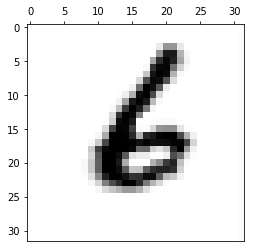

In [52]:
showImg(pic)

In [53]:
def normalization(w):
    w = (255.0*(w - w.min()))/(1.0* (w.max()-w.min()))
    w = w.astype('int')
    return w

In [54]:
###### Activation Functions #####

def ReLU(z):
    return np.maximum(0,z)

def sigmoid(z):
    return np.power(1+np.exp(-z),-1)

def softMax(z):
    z = normalization(z)
    return np.exp(z)/np.sum(np.exp(z),axis=0)

### LeNet Architecture :
##### INPUT => CONV  1 => RELU => MAX_ POOL 1=> CONV 2=> RELU => MAX_POOL 2 =>unrolled to vector => FC  => FC => SoftMAX(Output)

In [55]:
def activation_convolution(active,Z):
    
    if active=="ReLU":
        return ReLU(Z)
    
    elif active=="sigmoid":
        return sigmoid(Z)
    
    elif active=="tanh":
        return np.tanh(Z)
    
    else:
        print("Activation function doesn't Exist")
        return -1

In [56]:
def convolution_Forward(input_img, filter_w, bias, hyperParam):
    
    ( input_h , input_w , input_ch ) = input_img.shape # height,width,channel of image
    
    ( f , f, filter_ch) = filter_w.shape # height,width,channel of filter
    
    stride = hyperParam['stride']
    pad = hyperParam['pad']
    
    
    output_h = int((input_h  + 2*pad-f) / stride) + 1
    output_w = int((input_w  + 2*pad-f) / stride) + 1
    
    r1=[]
    
    
    for i in range(output_h):
        r2=[]
        for j in range(output_w):
            vert_start = i * stride
            vert_end = vert_start + f
            horiz_start = j * stride
            horiz_end = horiz_start + f
            
            img_sliced = input_img[vert_start:vert_end, horiz_start:horiz_end, :]
            
            conv_single_step= np.sum( np.multiply(img_sliced,filter_w))+bias
            
            r2.append(conv_single_step)
            
        r1.append(r2)
    w = np.array(r1)
    w = (255.0*(w - w.min()))/(1.0* (w.max()-w.min()))
    w = w.astype('int')
    
    ans = w.reshape(output_h,output_w,1)
    
    return ans


In [57]:
def convolutional_layer(image, filters,bias,hyperParam,activationFunction):
    output = []
    for cfilter in filters:
        
        conv = convolution_Forward(image, cfilter, bias,hyperParam)
        
        
        output.append(activation_convolution(activationFunction,np.array(conv) ) )
    return output

### Max Pooling Implementation

In [58]:
def Max_pool_forward(input_img, hparameters):
    
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    output_pool = [] #empty list to return output
    
    for r in input_img:
        x = r.reshape(r.shape[0],r.shape[0])
        out_pool = []
        for i in range(0,x.shape[0]-f+1,stride):
            row = []
            for j in range(0,x.shape[1]-f+1,stride):
                row.append(np.max(x[i:i+f, j:j+f]))
            out_pool.append(row)
        output_pool.append(np.asarray(out_pool))
    return np.asarray(output_pool), np.dstack(output_pool)

In [59]:
#### Random filters Generators #####

def getFilters(x,y,z,n):
    output = []
    for i in range(n):
        r=np.random.rand(x,y,z)*2-1
        output.append(np.around(r).astype('int'))
    return output

##### Conv 1

In [60]:
##### Setting the hyperParameters ########

no_of_Filters=6
hyperParameter={"pad":0,"stride":1}


In [61]:
##### Parameters ########
filters = getFilters(5,5,pic.shape[2],no_of_Filters)
bias=1

In [62]:
t = convolutional_layer(pic,filters,bias,hyperParameter,"ReLU")

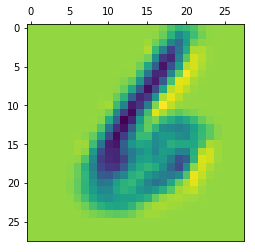

None


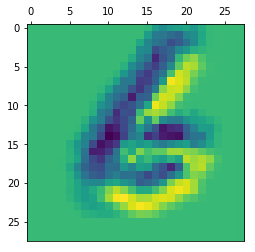

None


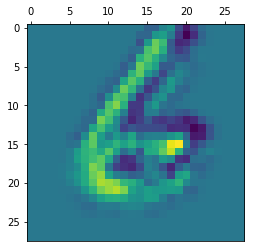

None


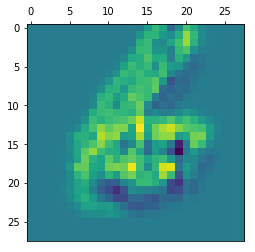

None


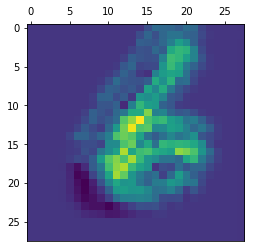

None


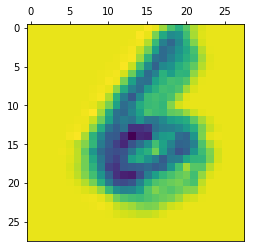

None


In [63]:
#convolutional layer 1 output
for r in t:
    print(showImg(r.reshape(r.shape[0],r.shape[0])))

#### MaxPooling 1

In [64]:
hparameters={"f":2,"stride":2}

In [65]:
list_out2, out2 = Max_pool_forward(t,hparameters)

In [66]:
out2.shape

(14, 14, 6)

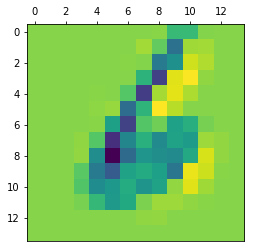

None


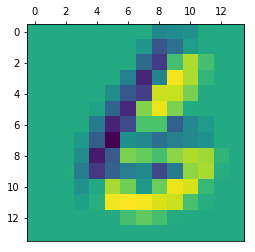

None


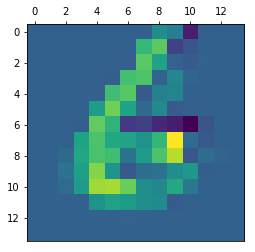

None


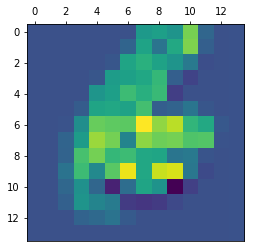

None


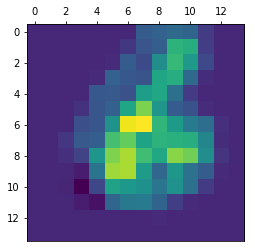

None


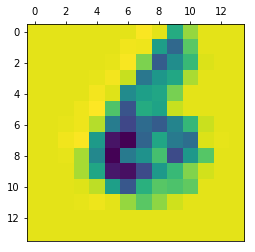

None


In [67]:
for r in list_out2:
    print (showImg(r))

#### Convolution Layer 2

In [68]:
##### Setting the hyperParameters ########

no_of_Filters=16
hyperParameter={"pad":0,"stride":1}


In [69]:
##### Parameters ########
filters = getFilters(5,5,out2.shape[2],no_of_Filters)
bias=1

In [70]:
t2 = convolutional_layer(out2,filters,bias,hyperParameter,"ReLU")

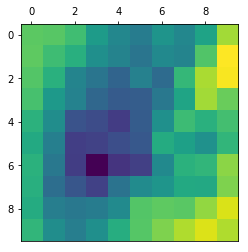

None


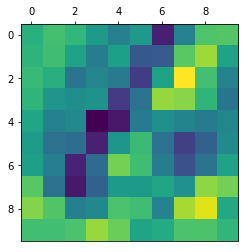

None


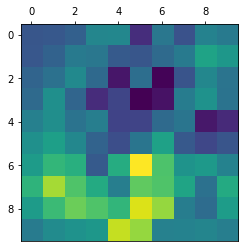

None


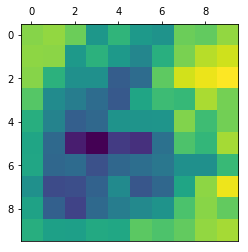

None


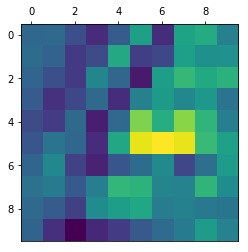

None


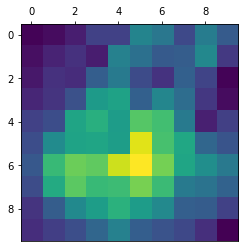

None


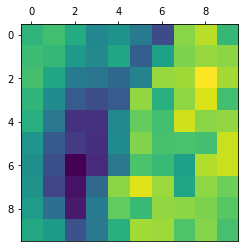

None


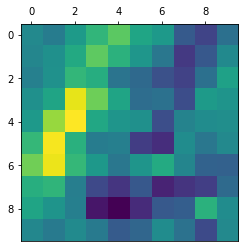

None


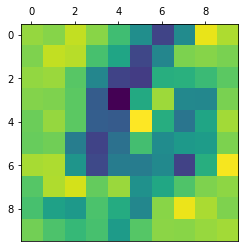

None


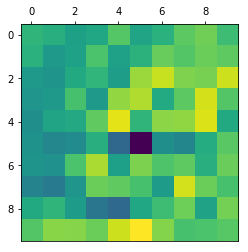

None


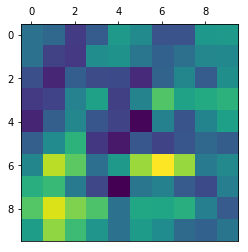

None


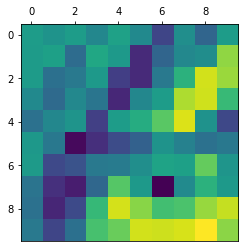

None


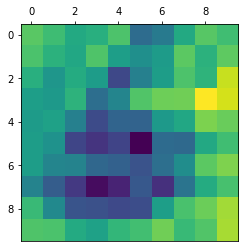

None


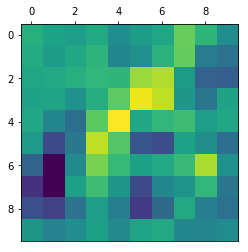

None


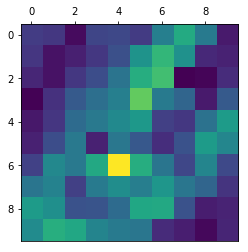

None


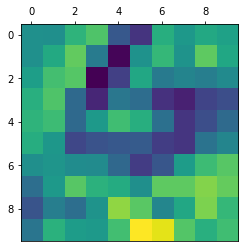

None


In [71]:
#convolutional layer 2 output
for r in t2:
    print(showImg(r.reshape(r.shape[0],r.shape[0])))

#### MaxPool2

In [72]:
list_out3, out3 = Max_pool_forward(t2,hparameters)
print(out3.shape)

(5, 5, 16)


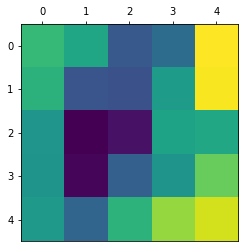

None


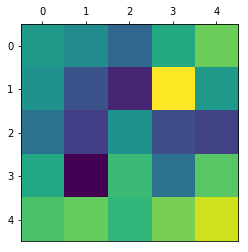

None


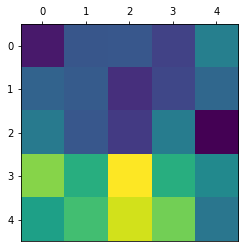

None


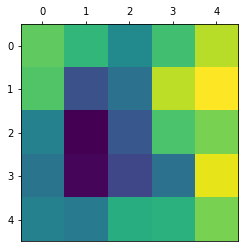

None


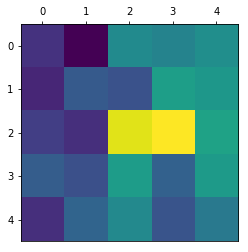

None


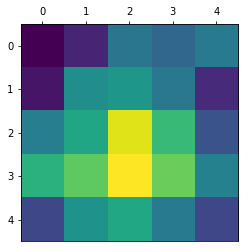

None


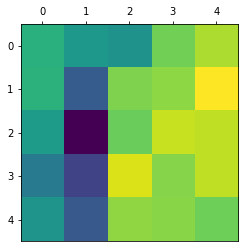

None


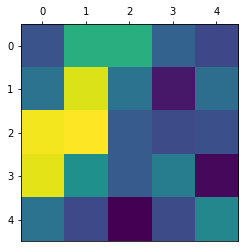

None


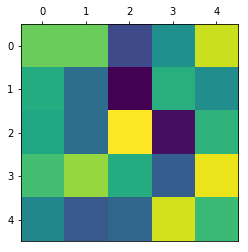

None


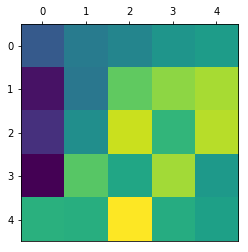

None


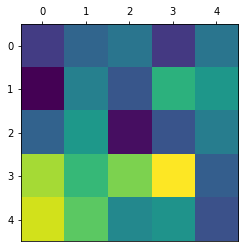

None


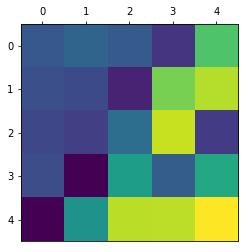

None


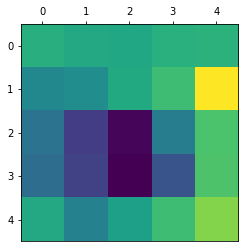

None


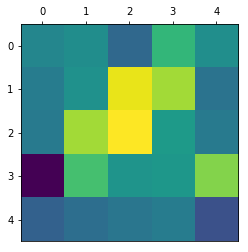

None


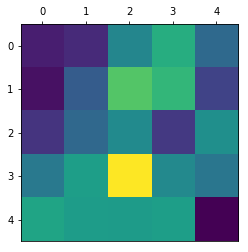

None


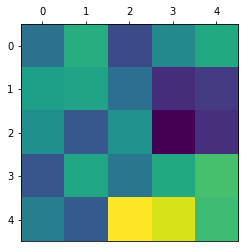

None


In [73]:
for r in list_out3:
    print (showImg(r))

#### Unrolled the output of layer2

In [94]:
flat_mat = out3.flatten()
print(flat_mat.shape)

(400,)


#### Fully connected 1

In [95]:
w = np.asmatrix(np.random.rand(120,flat_mat.shape[0]+1))

x = np.asmatrix(np.append(flat_mat,1))

fc1 = ReLU(np.asarray(np.matmul(w,x.T)))
print(fc1.shape)

(120, 1)


##### Fully connected 2

In [96]:
flat_mat = fc1.flatten()

w = np.asmatrix(np.random.rand(84,flat_mat.shape[0]+1))
x = np.asmatrix(np.append(flat_mat,1))

fc2 = ReLU(np.asarray(np.matmul(w,x.T)))

print(fc2.shape)

(84, 1)


#### Fully connected 3

In [97]:
flat_mat = fc2.flatten()

w = np.asmatrix(np.random.rand(10,flat_mat.shape[0]+1))

x = np.asmatrix(np.append(flat_mat,1))

fc3 = softMax(np.asarray(np.matmul(w,x.T)))

print(fc3.shape)


(10, 1)


In [98]:
fc3

array([[1.54008781e-051],
       [9.35762011e-014],
       [1.77852793e-068],
       [1.66427938e-081],
       [1.71390791e-015],
       [1.36853905e-044],
       [3.05902227e-007],
       [9.99999694e-001],
       [1.06487833e-063],
       [1.79848567e-111]])

In [100]:
print("Predicted value",np.argmax(fc3))

Predicted value 7


### Question2

**2.1**<br>
**Ans** No. of parameters  = No. of Filters * (No. of weights + bias)

${ No. of Parameters \hspace{.2cm}in \hspace{.2cm} layer1 =\\ (5*5*3+1)*6 = 456 parameters}$

**2.2**<br> 
**Ans** ${No. of Parameters \hspace{.2cm}in \hspace{.2cm} Pooling = 0 }$

**2.3** <br>
**Ans** c) Fully Connected Layer 

1. Convolutional Layer 1 : ${(5*5*3+1)*6 = 456}$

2. Pooling Layer 1 : 0

3. Convolutional Layer 2 :${(5*5*6+1)*16 = 2416}$ 

4. Pooling Layer 2 : 0

5. Fully Connected Layer 1 : ${120*(400+1)=48120}$

6. Fully Connected Layer 2 : ${84*(120+1)=10164}$

7. Fully Connected Layer 3 : ${(84+1)*10}=850$

**2.4**<br>
**Ans**  a) Initial convolution layers


As during memory, we consider parameters used + output, thus

Initial Convolutional Layer : ${(28*28*6) = 4704 }$

Fully Connected Layers : ${((84)*10) = 85}$

Initial Convolutional Layer consumes more memory .

**2.5**
Observation  of  by  applying  different  **activation  Function**.


In [101]:
allActivation=["ReLU","sigmoid","tanh"]

In [102]:
no_of_Filters=6
hyperParameter={"pad":0,"stride":1}

filters = getFilters(5,5,pic.shape[2],no_of_Filters)
bias=1

In [103]:
obv1=convolutional_layer(pic,filters,bias,hyperParameter,"sigmoid")


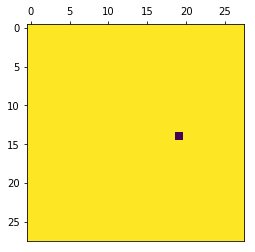

None


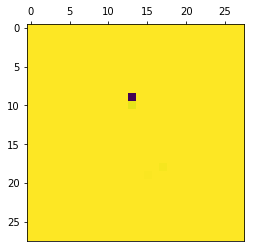

None


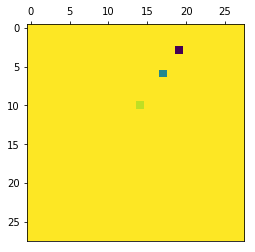

None


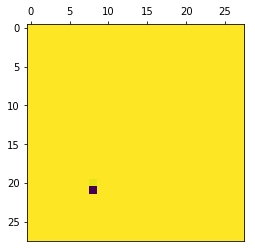

None


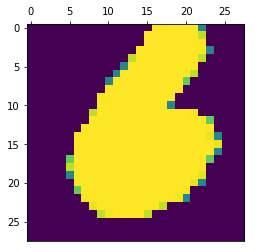

None


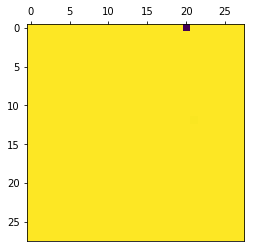

None


In [104]:
for r in obv1:
    print(showImg(r.reshape(r.shape[0],r.shape[0])))

**Observation :** <br>
- I think  the sigmoid,tanh doesn't works better because in Image classification using CNN we need pixels(output of conv layer) value which are useful or you can say that which can represent previous layer better with less features , but with sigmoid and tanh  compress Non-linearity to a range between 0 and 1 , between -1 and 1 respectively, it seems that they are unable to pass informative pixels to next layer.


- While the Relu is linear for positive values and pass informative pixels to next layer very well.

- Softmax is a classifier at the end of the neural network to regularize outputs to values between 0 and 1